### First download the dataset from Kaggle using the Kagglehub .
    #create a virtual invironment for your system .
     currently i am using python 3.10.0 in july'25 . (preety stable :)

     --pip install kagglehub
     

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("behrad3d/nasa-cmaps")

print("Path to dataset files:", path)

d:\turbofan_RUL\Turbofan-Engine-Remaining_Useful_Life\tf_rul\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 12.3M/12.3M [00:03<00:00, 4.21MB/s]

Extracting files...


Path to dataset files: C:\Users\amans\.cache\kagglehub\datasets\behrad3d\nasa-cmaps\versions\1


In [ ]:
### I copied the filed to my workdir
# CMPASS folder which contains the various engine dataset.

In [ ]:
with open("CMaps\\readme.txt", "r") as readme_txt:
    content = readme_txt.read()


print(content)

Data Set: FD001
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: ONE (HPC Degradation)

Data Set: FD002
Train trjectories: 260
Test trajectories: 259
Conditions: SIX 
Fault Modes: ONE (HPC Degradation)

Data Set: FD003
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: TWO (HPC Degradation, Fan Degradation)

Data Set: FD004
Train trjectories: 248
Test trajectories: 249
Conditions: SIX 
Fault Modes: TWO (HPC Degradation, Fan Degradation)



Experimental Scenario

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine – i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. Th

In [ ]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
!ls CMaps

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
import os


def content_CMPAS(files):
    for file in files:
        return print(files)


print(content_CMPAS(files=os.listdir("CMaps")))

['readme.txt', 'RUL_FD001.txt', 'RUL_FD002.txt', 'RUL_FD003.txt', 'RUL_FD004.txt', 'test_FD001.txt', 'test_FD002.txt', 'test_FD003.txt', 'test_FD004.txt', 'train_FD001.txt', 'train_FD002.txt', 'train_FD003.txt', 'train_FD004.txt', 'x.txt']
None


In [ ]:
DATASET_NAMES = ["FD001", "FD002", "FD003", "FD004"]

TRAIN_DATA_FILES = [("CMaps/train_{}.txt", format(x), x) for x in DATASET_NAMES]
TEST_DATA_FILES = [("CMaps/test_{}.txt", format(x), x) for x in DATASET_NAMES]

TEST_DATA_RUL_FILES = [("CMapas/RUL_{}.txt", format(x), x) for x in DATASET_NAMES]

OP_SETTING_COLUMNS = ["op_setting_{}".format(x) for x in range(1, 4)]
SENSOR_COLUMNS = ["sensor_{}".format(x) for x in range(1, 22)]

In [ ]:
###Lets take a look at the raw training batch files  we have downloaded.

df = pd.read_csv("CMaps/train_FD001.txt", sep="\s+", header=None)
df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694


In [ ]:
###Lets create aa function to load our raw data into structured Dataframe.
def read_data(filename):
    col_names = ["unit", "time_cycles"] + OP_SETTING_COLUMNS + SENSOR_COLUMNS
    return pd.read_csv(filename, sep="\s+", header=None, names=col_names)

In [23]:
train_FD001 = read_data("CMaps/train_FD001.txt")
train_FD001

,unit,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


### Lets Envelope all the above code in a single block of python code .

In [ ]:
import pandas as pd

OP_SETTING_COLUMNS = ["op1", "op2", "op3"]
SENSOR_COLUMNS = [f"sensor{i}" for i in range(1, 22)]


def read_data(filename):
    col_names = ["unit", "time_cycles"] + OP_SETTING_COLUMNS + SENSOR_COLUMNS
    return pd.read_csv(filename, sep="\s+", header=None, names=col_names)


datasets = ["FD001", "FD002", "FD003", "FD004"]
TRAIN_DATA_FILES = [(f"CMaps/train_{ds}.txt", ds) for ds in datasets]

train = []
for dataset in TRAIN_DATA_FILES:
    dataset_df = read_data(dataset[0])
    dataset_df["dataset"] = dataset[1]
    train.append(dataset_df)

train = pd.concat(train, ignore_index=True)

print("train.shape =", train.shape)
train.head(2)

train.shape = (160359, 27)


,unit,time_cycles,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,dataset
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,FD001
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,FD001


In [ ]:
TEST_DATA_FILES = [(f"CMaps/test_{ds}.txt", ds) for ds in datasets]


test = []
for dataset in TEST_DATA_FILES:
    dataset_df = read_data(dataset[0])
    dataset_df["dataset"] = dataset[1]
    test.append(dataset_df)

test = pd.concat(test, ignore_index=True)

print("test.shape = {}".format(test.shape))

test.shape = (104897, 27)


In [39]:
TEST_DATA_RUL_FILES = [(f"CMaps/RUL_{ds}.txt", ds) for ds in datasets]

test_rul = []
for dataset in TEST_DATA_RUL_FILES:
    dataset_df = pd.read_csv(dataset[0], header=None, names=["rul"])
    dataset_df["dataset"] = dataset[1]
    test_rul.append(dataset_df)

test_rul = pd.concat(test_rul, ignore_index=True)
test_rul["unit"] = test[["unit", "dataset"]].drop_duplicates()["unit"].values

print(f"test_rul.shape = {test_rul.shape}")

test_rul.head(20)

test_rul.shape = (707, 3)


,rul,dataset,unit
0,112,FD001,1
1,98,FD001,2
2,69,FD001,3
3,82,FD001,4
4,91,FD001,5
5,93,FD001,6
6,91,FD001,7
7,95,FD001,8
8,111,FD001,9
9,96,FD001,10


In [47]:
train.describe()

,unit,time_cycles,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,...,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000
mean,105.553758,123.331338,17.211973,0.410004,95.724344,485.840890,597.361022,1467.035653,1260.956434,9.894999,...,338.789821,2349.645243,8088.950972,9.054747,0.025185,360.698801,2273.754039,98.389146,25.942709,15.565700
std,72.867325,83.538146,16.527988,0.367938,12.359044,30.420388,42.478516,118.175261,136.300073,4.265554,...,164.193480,111.167242,80.623257,0.751581,0.004997,31.021430,142.513114,4.656270,11.691422,7.015067
min,1.000000,1.000000,-0.008700,-0.000600,60.000000,445.000000,535.480000,1242.670000,1023.770000,3.910000,...,128.310000,2027.570000,7845.780000,8.156300,0.020000,302.000000,1915.000000,84.930000,10.160000,6.010500
25%,44.000000,57.000000,0.001300,0.000200,100.000000,449.440000,549.960000,1357.360000,1126.830000,5.480000,...,164.790000,2387.970000,8070.530000,8.439250,0.020000,332.000000,2212.000000,100.000000,14.330000,8.601300
50%,89.000000,114.000000,19.998100,0.620000,100.000000,489.050000,605.930000,1492.810000,1271.740000,9.350000,...,321.690000,2388.070000,8118.590000,9.030100,0.030000,367.000000,2319.000000,100.000000,24.920000,14.953500
75%,164.000000,173.000000,35.001500,0.840000,100.000000,518.670000,642.340000,1586.590000,1402.200000,14.620000,...,521.340000,2388.160000,8139.410000,9.344200,0.030000,392.000000,2388.000000,100.000000,38.820000,23.294600
max,260.000000,543.000000,42.008000,0.842000,100.000000,518.670000,645.110000,1616.910000,1441.490000,14.620000,...,537.490000,2390.490000,8293.720000,11.066900,0.030000,400.000000,2388.000000,100.000000,39.890000,23.950500


In [ ]:
###Lets go into visulaization step by step approach.

df = train.groupby("dataset")
df.describe()

unit                                                         \
           count        mean        std  min   25%    50%    75%    max   
dataset                                                                   
FD001    20631.0   51.506568  29.227633  1.0  26.0   52.0   77.0  100.0   
FD002    53759.0  131.082981  74.463862  1.0  68.0  131.0  195.0  260.0   
FD003    24720.0   48.631877  29.348985  1.0  23.0   47.0   74.0  100.0   
FD004    61249.0  124.325181  71.995350  1.0  60.0  126.0  185.0  249.0   

        time_cycles              ... sensor20        sensor21             \
              count        mean  ...      75%    max    count       mean   
dataset                          ...                                       
FD001       20631.0  108.807862  ...    38.95  39.43  20631.0  23.289705   
FD002       53759.0  109.154746  ...    28.47  39.34  53759.0  12.473423   
FD003       24720.0  139.077063  ...    39.14  39.85  24720.0  23.393024   
FD004       61249.0  134.311417  ...    28.56  39.89  61249.0  12.518995   

                                                                
              std      min      25%      50%      75%      max  
dataset                                                         
FD001    0.108251  22.8942  23.2218  23.2979  23.3668  23.6184  
FD002    5.921615   6.0105   6.5463   8.9292  17.0832  23.5901  
FD003    0.149234  22.8726  23.2962  23.3916  23.4833  23.9505  
FD004    5.962697   6.0843   6.5661   8.9601  17.1355  23.8852  

[4 rows x 208 columns]

In [ ]:
train.groupby("dataset").size()

dataset
FD001    20631
FD002    53759
FD003    24720
FD004    61249
dtype: int64

In [ ]:
train.groupby("dataset")["unit"].max().sort_values()

dataset
FD001    100
FD003    100
FD004    249
FD002    260
Name: unit, dtype: int64

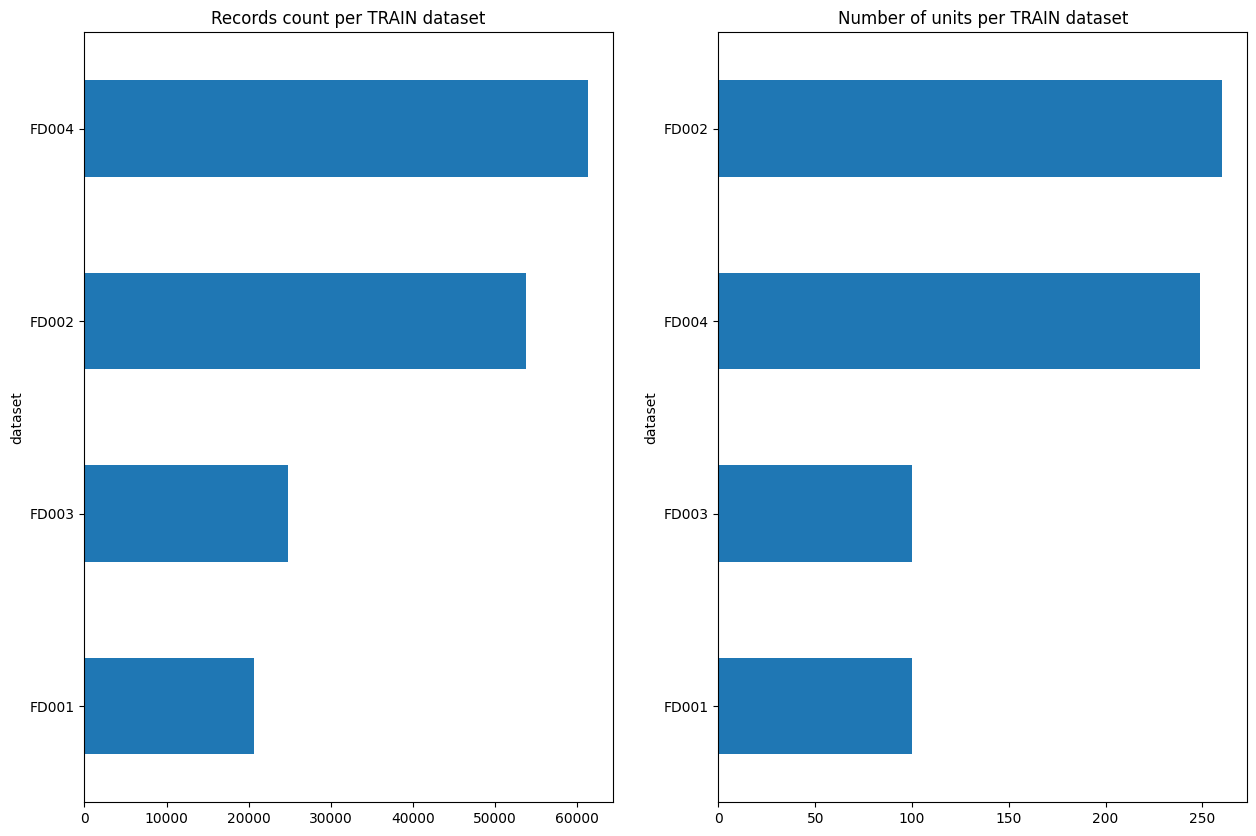

In [ ]:
#

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
train.groupby("dataset").size().sort_values().plot.barh(ax=ax[0])
ax[0].set_title("Records count per TRAIN dataset")

train.groupby("dataset")["unit"].max().sort_values().plot.barh(ax=ax[1])
ax[1].set_title("Number of units per TRAIN dataset")

fig.show()